In [15]:
import numpy as np
from SVM import *
%load_ext autoreload
%autoreload 2
import scipy.io
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


shape of svm.y is (400,)


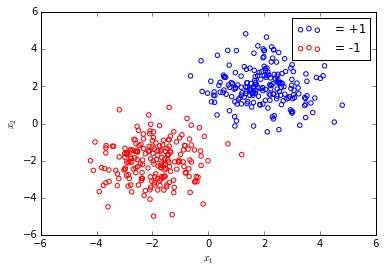

In [16]:
filename = "data_stdev1"
svm = SVM.fromFile(filename, type="train")
# print svm.x
# print svm.y
print "shape of svm.y is " + str(np.shape(svm.y))
svm.plotData()

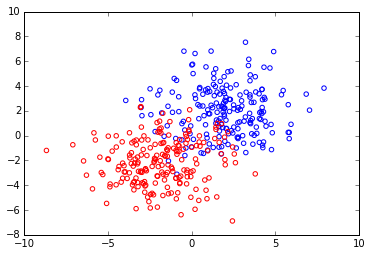

In [3]:
filename = "data_stdev2"
svm = SVM.fromFile(filename, type="train")
svm.plotData()

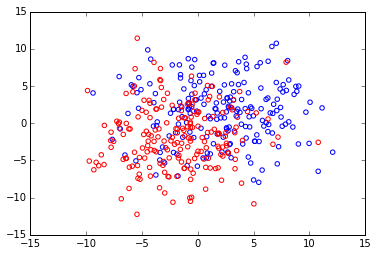

In [4]:
filename = "data_stdev4"
svm = SVM.fromFile(filename, type="train")
svm.plotData()

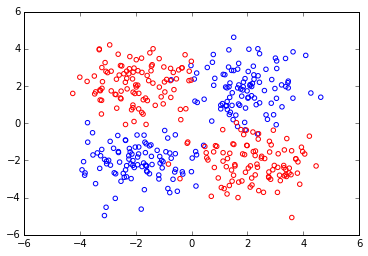

In [5]:
filename = "data_nonsep"
svm = SVM.fromFile(filename, type="train")
svm.plotData()

## Primal Forms

___

### Primal form for Hard-SVM

To get us in the right mindset, consider the primal form of the Hard-SVM:

$$ \underset{\theta, \theta_0}{\text{max}} \frac{1}{||\theta||} \underset{1 \le i \le n}{\text{min}} y^{(i)}(\theta^Tx^{(i)} + \theta_0)$$

Note that this is only valid for linearly separable data, since we need $y^{(i)}(\theta^Tx^{(i)} + \theta_0) /ge 0$ for all $i$.

We can see how this is ill-posed since $\theta$ can just be scaled by a non-zero scalar and the objective function value does not change.  (To illustrate... we can take out the scalar $c$ from the 2-norm in the denominator, and outside the minimization since $c$ is not a function of $i$, and they cancel)

$$ \underset{\theta, \theta_0}{\text{max}} \frac{1}{||c\theta||} \underset{1 \le i \le n}{\text{min}} y^{(i)}(c\theta^Tx^{(i)} + c\theta_0)$$

$$= \underset{\theta, \theta_0}{\text{max}} \frac{c}{c||\theta||} \underset{1 \le i \le n}{\text{min}} y^{(i)}(\theta^Tx^{(i)} + \theta_0)$$

$$ \underset{\theta, \theta_0}{\text{max}} \frac{1}{||\theta||} \underset{1 \le i \le n}{\text{min}} y^{(i)}(\theta^Tx^{(i)} + \theta_0)$$

We exploit this ambiguity and choose the scale such that the inside minimization is set to 1.

$$ \underset{1 \le i \le n}{\text{min}} y^{(i)}(\theta^Tx^{(i)} + \theta_0) = 1 $$

This lets us separate our "max-min" problem into one maximization problem with a constraint:

$$ \underset{\theta, \theta_0}{\text{max}} \frac{1}{||\theta||}, \ \ \ s.t. \underset{1 \le i \le n}{\text{min}} y^{(i)}(\theta^Tx^{(i)} + \theta_0) = 1$$

We then convert the objective to a minimization (nicer to hand to solvers) and the constraint into a linear inequality:

$$ \underset{\theta, \theta_0}{\text{min}} \  ||\theta||^2, \ \ \ s.t. y^{(i)}(\theta^Tx^{(i)} + \theta_0) \ge 1, \ \ \ 1 \le i \le n$$


### Primal form for the Soft-SVM

That seems nice, and lets us find an optimal decision boundary for data that is easily separated.  (Kind of like getting a gold medal in skipping.)  But what if the data is not linearly separable?  This is a little more interesting.

To allow data that is not linearly separable, we add a slack variable $\xi_i \ge 0$ for each data point:

$$ \underset{\theta, \theta_0, \xi}{\text{min}} \  ||\theta||^2 + C \sum_{i=1}^n \xi_i, \ \ \ s.t. y^{(i)}(\theta^Tx^{(i)} + \theta_0) \ge 1 - \xi_i, \ \ \ \xi_i \ge 0,  1 \le i \le n$$



This is called **Soft-SVM**.  The slack variables allow the data to not be linearly separable, but adding the sum of the slack variables to the objective function encodes that the violation of linear separability will be minimal.



## Dual Forms

___

### Dual form for the Hard-SVM

Ask for some help from our friend Joe Lagrange and arrive at the **dual form for the Hard-SVM**:

$$ \underset{a \in \mathbb{R}^N}{max} \sum_{i=1}^Na_n - \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_na_mt_nt_mk(\mathbf{x}_n, \mathbf{x}_m)$$

$$s.t. a_n \ge 0, \ \ \ n = 1,...,N $$

$$s.t. \sum_{n=1}^Na_nt_n = 0$$

Where we have our kernel function (which needs to be valid) as the inner product in feature space: $k(\mathbf{x}, \mathbf{x}') = \phi(\mathbf{x})^T\phi(\mathbf{x}')$

The KKT conditions require that the constraints can be formulated as:

$$s.t. a_n \ge 0, \ \ \ n = 1,...,N $$

$$s.t. t_ny(\mathbf{x}_n) - 1 \ge 0 $$

$$a_n \{ t_ny(\mathbf{x}_n) -1 \} = 0 $$

We can see that any data point for which $a_n = 0$ will not appear in the sum used to predict classification labels for new data points:

$$ y(\mathbf{x}) = \sum_{n=1}^N a_nt_nk(\mathbf{x},\mathbf{x}_n) + b$$

Hence giving the SVM its "sparse" dependence on training data.

It is only the data points that satisfy $t_ny(\mathbf{x}_n)=1$ that are used for prediction -- these are the **support vectors**.

We can solve for $b$ via:

$$ b = \frac{1}{N_\mathcal{S}} \sum_{n \in \mathcal{S}} \bigg(t_n  - \sum_{m \in \mathcal{S}} a_mt_mk(\mathbf{x}_n, \mathbf{x}_m) \bigg) $$

Where $\mathcal{S}$ denotes the set of indices of the support vectors, and $N_{\mathcal{S}}$ is the number of support vectors.



### Dual form for the Soft-SVM

... I don't quite follow yet, but the dual form of the SVM is:

$$ \underset{\alpha \in \mathbb{R}^N}{\text{max}} \sum_{n=1}^N a_n - \frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N a_na_mt_nt_mk(\mathbf{x}_n, \mathbf{x}_m)$$

$$ s.t. 0 \le a_n \le C $$

$$ s.t. \sum_{n=1}^N a_nt_n = 0 $$

Where again the $n$ for which $t_ny(\mathbf{x}_n)=1$ holds are the indices of the support vectors.  Note also that $C$ controls the tradeoff between the slack variable penalty and the margin.

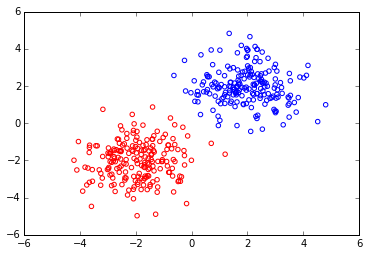

In [6]:
filename = "data_stdev1"
svm = SVM.fromFile(filename, type="train")
svm.plotData()

### Install cvxopt

Note that you'll need to install cvxopt, an optimization package for Python:

    Instructions at http://cvxopt.org/download/index.html

Quick install:

    git clone https://github.com/cvxopt/cvxopt.git
    sudo python setup.py install
    

### Read cvxopt documentation

The relevant documentation for us can be found here: http://cvxopt.org/userguide/coneprog.html#quadratic-programming

### Solving the SVM

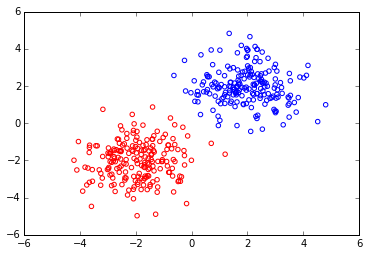

In [7]:
svm.plotData()

In [8]:
print svm.x.shape
svm.computeSolution()

(400, 2)
     pcost       dcost       gap    pres   dres
 0: -4.4193e+01 -7.6807e+02  4e+03  3e+00  2e-14
 1: -2.5625e+01 -4.0062e+02  7e+02  3e-01  2e-14
 2: -9.8118e+00 -5.7793e+01  8e+01  3e-02  9e-15
 3: -6.4730e+00 -2.5050e+01  3e+01  1e-02  4e-15
 4: -4.3213e+00 -1.6635e+01  2e+01  8e-03  3e-15
 5: -2.3964e+00 -5.0388e+00  4e+00  1e-03  2e-15
 6: -2.4183e+00 -2.6473e+00  3e-01  6e-05  2e-15
 7: -2.4593e+00 -2.4861e+00  3e-02  2e-06  2e-15
 8: -2.4700e+00 -2.4703e+00  4e-04  3e-08  2e-15
 9: -2.4701e+00 -2.4701e+00  4e-06  3e-10  2e-15
10: -2.4701e+00 -2.4701e+00  4e-08  3e-12  2e-15
Optimal solution found.


In [11]:
supportVectorsIdx = np.where(svm.a > 1e-6)[0]
print supportVectorsIdx.size
print supportVectorsIdx
print svm.a[supportVectorsIdx][:,0]

5
[ 29 160 178 216 382]
[ 1.          0.05007837  0.94992165  1.          1.        ]


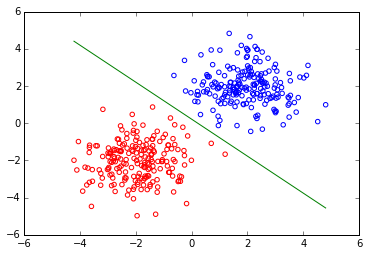

In [12]:
svm.plotData()

## Part 1

Show in your report the constraints and objective that you generate for the 2D problem with positive examples (1, 2), (2, 2) and negative examples (0, 0), (-2, 3).

In [13]:
# X = np.array([[1,2],[2,2],[0,0],[-2,3]]) * 1.0
# print X
# Y = np.array([[1],[1],[-1],[-1]]) * 1.0
# print Y
# svm = SVM(X,Y)
# print svm.x
# print svm.y
# print "shape of svm.y is " + str(np.shape(svm.y))
# # print svm.N
# # print svm.d
# print np.shape(svm.x)
# svm.plotData()
# svm.computeSolution()
# svm.plotData()

     pcost       dcost       gap    pres   dres
 0: -4.8621e-01 -5.7008e+00  5e+00  3e-17  7e-16
 1: -5.2063e-01 -6.3338e-01  1e-01  2e-16  5e-16
 2: -5.3043e-01 -5.3181e-01  1e-03  2e-16  5e-16
 3: -5.3061e-01 -5.3062e-01  1e-05  2e-16  3e-16
 4: -5.3061e-01 -5.3061e-01  1e-07  2e-16  2e-16
Optimal solution found.


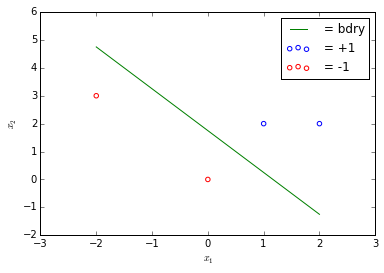

In [17]:
filename = "data_part1"
svm = SVM.fromFile(filename, type="train")
#svm.plotData()
svm.computeSolution()
svm.plotData()

## Part 2

Test your implementation on the same 2D datasets from problem 1.  Set C=1 and report/explain your decision boundary and classification error rate on the training and validation sets We pro- vide the skeleton code svm test.py/m).

======Training======
     pcost       dcost       gap    pres   dres
 0: -4.4193e+01 -7.6807e+02  4e+03  3e+00  2e-14
 1: -2.5625e+01 -4.0062e+02  7e+02  3e-01  2e-14
 2: -9.8118e+00 -5.7793e+01  8e+01  3e-02  9e-15
 3: -6.4730e+00 -2.5050e+01  3e+01  1e-02  4e-15
 4: -4.3213e+00 -1.6635e+01  2e+01  8e-03  3e-15
 5: -2.3964e+00 -5.0388e+00  4e+00  1e-03  2e-15
 6: -2.4183e+00 -2.6473e+00  3e-01  6e-05  2e-15
 7: -2.4593e+00 -2.4861e+00  3e-02  2e-06  2e-15
 8: -2.4700e+00 -2.4703e+00  4e-04  3e-08  2e-15
 9: -2.4701e+00 -2.4701e+00  4e-06  3e-10  2e-15
10: -2.4701e+00 -2.4701e+00  4e-08  3e-12  2e-15
Optimal solution found.


/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


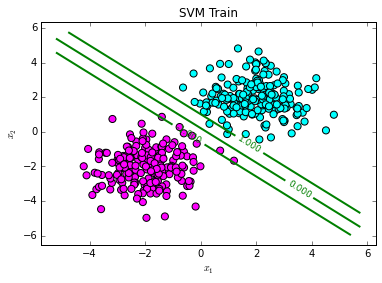

number of entries missclassified = 0
missclassification rate  = 0.0
======Validation======


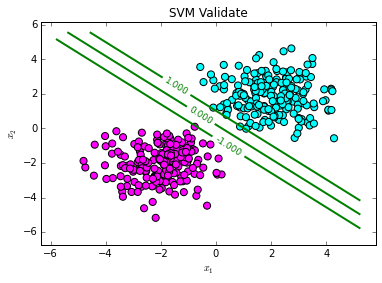

number of entries missclassified = 0
missclassification rate  = 0.0


In [47]:
from numpy import *
from plotBoundary import *
# import your SVM training code

# parameters
name = 'stdev1'
print '======Training======'
# load data from csv files
train = loadtxt('hw2_resources/data/data_'+name+'_train.csv')
# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

# Carry out training, primal and/or dual
svm = SVM(X,Y)
svm.computeSolution()
# Define the predictSVM(x) function, which uses trained parameters
predictSVM = svm.predictorFunction

# plot training results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Train')
# print misclassification rate
cer_train,_ = svm.CER_type(type="train", rescale=False, verbose=True, rescaleMethod="interval", file=name)

print '======Validation======'
# load data from csv files
validate = loadtxt('hw2_resources/data/data_'+name+'_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
# plot validation results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Validate')
# print misclassification rate
cer_train,_ = svm.CER_type(type="validate", rescale=False, verbose=True, rescaleMethod="interval", file=name)

======Training======
     pcost       dcost       gap    pres   dres
 0: -1.3521e+02 -9.2075e+02  5e+03  3e+00  3e-14
 1: -9.0627e+01 -5.6920e+02  9e+02  3e-01  3e-14
 2: -7.7601e+01 -1.7162e+02  1e+02  4e-02  1e-14
 3: -8.2187e+01 -1.0678e+02  3e+01  9e-03  1e-14
 4: -8.4860e+01 -9.6919e+01  1e+01  4e-03  1e-14
 5: -8.5939e+01 -9.3994e+01  9e+00  2e-03  1e-14
 6: -8.7174e+01 -9.1296e+01  5e+00  8e-04  1e-14
 7: -8.8026e+01 -8.9604e+01  2e+00  2e-04  1e-14
 8: -8.8351e+01 -8.9087e+01  8e-01  9e-05  1e-14
 9: -8.8580e+01 -8.8708e+01  1e-01  2e-15  2e-14
10: -8.8626e+01 -8.8661e+01  3e-02  2e-14  1e-14
11: -8.8638e+01 -8.8648e+01  1e-02  5e-14  1e-14
12: -8.8643e+01 -8.8643e+01  1e-04  7e-14  1e-14
13: -8.8643e+01 -8.8643e+01  1e-06  4e-14  2e-14
Optimal solution found.


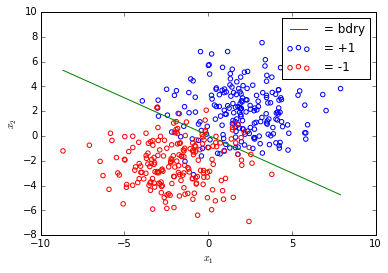

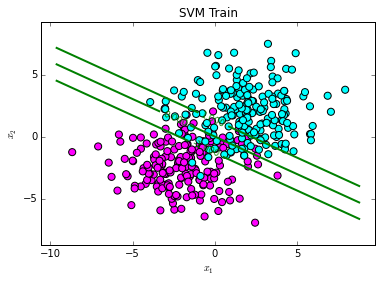

number of entries missclassified = 37
missclassification rate  = 0.0925
======Validation======


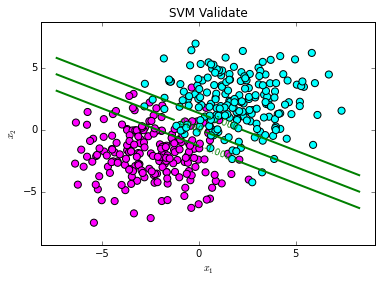

number of entries missclassified = 34
missclassification rate  = 0.085


In [48]:
# parameters
name = 'stdev2'
print '======Training======'
# load data from csv files
train = loadtxt('hw2_resources/data/data_'+name+'_train.csv')
# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

# Carry out training, primal and/or dual
svm = SVM(X,Y)
svm.computeSolution()
svm.plotData()
# Define the predictSVM(x) function, which uses trained parameters
predictSVM = svm.predictorFunction

# plot training results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Train')
# print misclassification rate
cer_train,_ = svm.CER_type(type="train", rescale=False, verbose=True, rescaleMethod="interval", file=name)


print '======Validation======'
# load data from csv files
validate = loadtxt('hw2_resources/data/data_'+name+'_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
# plot validation results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Validate')
# print misclassification rate
cer_train,_ = svm.CER_type(type="validate", rescale=False, verbose=True, rescaleMethod="interval", file=name)

======Training======
     pcost       dcost       gap    pres   dres
 0: -2.8306e+02 -1.1910e+03  6e+03  3e+00  2e-13
 1: -1.9107e+02 -8.4825e+02  9e+02  2e-01  9e-14
 2: -1.9832e+02 -2.8406e+02  9e+01  1e-02  7e-14
 3: -2.2852e+02 -2.5279e+02  3e+01  3e-03  7e-14
 4: -2.3377e+02 -2.4793e+02  1e+01  2e-03  7e-14
 5: -2.3775e+02 -2.4410e+02  7e+00  6e-04  8e-14
 6: -2.3970e+02 -2.4205e+02  2e+00  2e-04  8e-14
 7: -2.4037e+02 -2.4137e+02  1e+00  5e-05  9e-14
 8: -2.4065e+02 -2.4107e+02  4e-01  2e-05  9e-14
 9: -2.4078e+02 -2.4093e+02  2e-01  6e-06  8e-14
10: -2.4085e+02 -2.4086e+02  6e-03  4e-08  9e-14
11: -2.4085e+02 -2.4085e+02  6e-05  4e-10  9e-14
Optimal solution found.


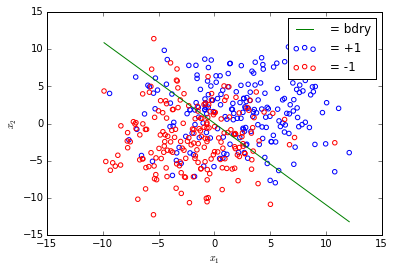

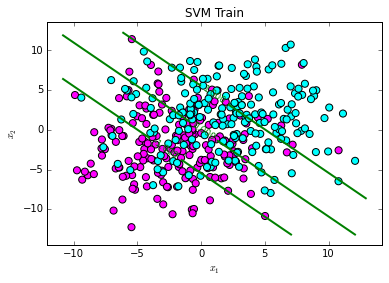

number of entries missclassified = 106
missclassification rate  = 0.265
======Validation======


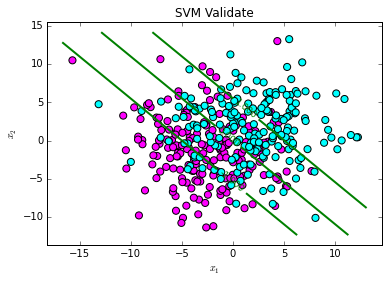

number of entries missclassified = 95
missclassification rate  = 0.2375


In [49]:
# parameters
name = 'stdev4'
print '======Training======'
# load data from csv files
train = loadtxt('hw2_resources/data/data_'+name+'_train.csv')
# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

# Carry out training, primal and/or dual
svm = SVM(X,Y)
svm.computeSolution()
svm.plotData()
# Define the predictSVM(x) function, which uses trained parameters
predictSVM = svm.predictorFunction

# plot training results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Train')
# print misclassification rate
cer_train,_ = svm.CER_type(type="train", rescale=False, verbose=True, rescaleMethod="interval", file=name)



print '======Validation======'
# load data from csv files
validate = loadtxt('hw2_resources/data/data_'+name+'_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
# plot validation results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Validate')
# print misclassification rate
cer_train,_ = svm.CER_type(type="validate", rescale=False, verbose=True, rescaleMethod="interval", file=name)

======Training======
     pcost       dcost       gap    pres   dres
 0: -3.9943e+02 -8.3677e+02  2e+03  2e+00  2e-13
 1: -3.2414e+02 -5.6736e+02  2e+02  2e-13  2e-13
 2: -3.7626e+02 -4.2396e+02  5e+01  7e-14  2e-13
 3: -3.8045e+02 -4.0889e+02  3e+01  1e-13  2e-13
 4: -3.8292e+02 -4.0370e+02  2e+01  4e-14  2e-13
 5: -3.8531e+02 -3.9967e+02  1e+01  1e-13  2e-13
 6: -3.8856e+02 -3.9427e+02  6e+00  2e-14  2e-13
 7: -3.8956e+02 -3.9278e+02  3e+00  6e-14  2e-13
 8: -3.8995e+02 -3.9216e+02  2e+00  3e-13  2e-13
 9: -3.9051e+02 -3.9143e+02  9e-01  2e-13  2e-13
10: -3.9079e+02 -3.9113e+02  3e-01  5e-14  2e-13
11: -3.9091e+02 -3.9100e+02  9e-02  2e-14  2e-13
12: -3.9095e+02 -3.9095e+02  2e-03  3e-14  2e-13
13: -3.9095e+02 -3.9095e+02  2e-05  4e-14  2e-13
Optimal solution found.


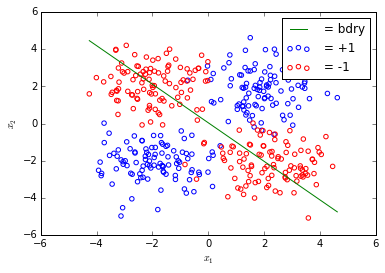

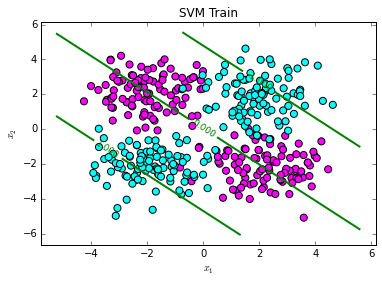

number of entries missclassified = 196
missclassification rate  = 0.49
======Validation======


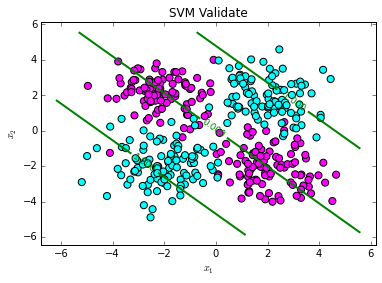

number of entries missclassified = 206
missclassification rate  = 0.515


In [50]:
# parameters
name = 'nonsep'
print '======Training======'
# load data from csv files
train = loadtxt('hw2_resources/data/data_'+name+'_train.csv')
# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

# Carry out training, primal and/or dual
svm = SVM(X,Y)
svm.computeSolution()
svm.plotData()
# Define the predictSVM(x) function, which uses trained parameters
predictSVM = svm.predictorFunction

# plot training results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Train')
# print misclassification rate
cer_train,_ = svm.CER_type(type="train", rescale=False, verbose=True, rescaleMethod="interval", file=name)



print '======Validation======'
# load data from csv files
validate = loadtxt('hw2_resources/data/data_'+name+'_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
# plot validation results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Validate')
# print misclassification rate
cer_train,_ = svm.CER_type(type="validate", rescale=False, verbose=True, rescaleMethod="interval", file=name)


## Part 3

The dual form SVM is useful for several reasons, including an ability to handle kernel functions that are hard to express as feature functions in the primal form. Extend your dual form SVM code to operate with kernels. Do the implementation as generally as possible, so that it either takes the kernel function or kernel matrix as input. Test for values of C = {0.01, 0.1, 1, 10, 100} and for the Gaussian kernel with some varying bandwidths. Report your result and answer the following questions:


(a) What happens to the geometric margin 1/||w|| as C increases? Will this always happen as we increase C?

(b) What happens to the number of support vectors as C increases?

(c) The value of C will typically change the resulting classifier and therefore also affects the accuracy on test examples. Why would maximizing the geometric margin 1/||w|| on the training set not be an appropriate criterion for selecting C? Is there an alternative criterion that we could use for this purpose?

======Training======
     pcost       dcost       gap    pres   dres
 0: -5.2829e+00 -4.4869e+02  2e+03  1e+00  8e-16
 1: -1.5767e-01 -1.4901e+02  2e+02  6e-03  7e-16
 2: -6.5894e+00 -2.8727e+01  2e+01  8e-04  7e-16
 3: -8.3666e+00 -1.3616e+01  5e+00  1e-04  5e-16
 4: -8.8882e+00 -9.9662e+00  1e+00  2e-05  5e-16
 5: -9.0213e+00 -9.3687e+00  3e-01  3e-06  5e-16
 6: -9.0840e+00 -9.1668e+00  8e-02  1e-08  5e-16
 7: -9.1006e+00 -9.1339e+00  3e-02  3e-09  5e-16
 8: -9.1080e+00 -9.1185e+00  1e-02  2e-10  5e-16
 9: -9.1113e+00 -9.1134e+00  2e-03  9e-12  6e-16
10: -9.1121e+00 -9.1123e+00  1e-04  1e-13  5e-16
11: -9.1122e+00 -9.1122e+00  2e-05  8e-15  5e-16
12: -9.1122e+00 -9.1122e+00  2e-07  1e-14  6e-16
Optimal solution found.


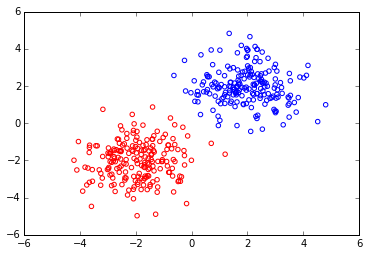

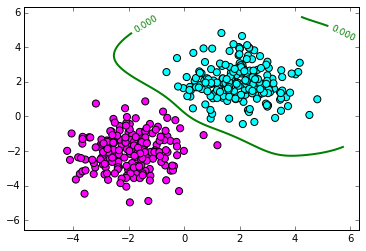

======Validation======


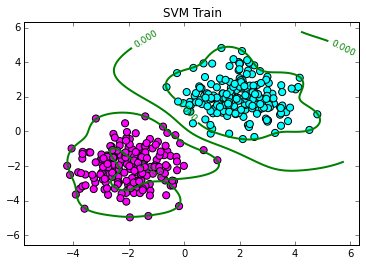

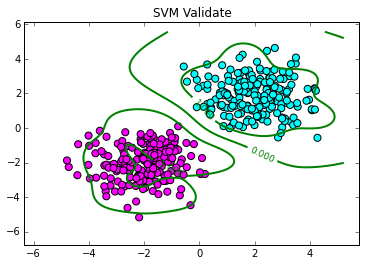

In [8]:
# parameters
name = 'stdev1'
print '======Training======'
# load data from csv files
train = loadtxt('hw2_resources/data/data_'+name+'_train.csv')
# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

# Carry out training, primal and/or dual
svm = SVM(X,Y, kernel='Gaussian', C=1, bandwidth=1)
svm.computeSolution()
svm.plotData()
# Define the predictSVM(x) function, which uses trained parameters
predictSVM = svm.predictorFunction

# plot training results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Train')


print '======Validation======'
# load data from csv files
validate = loadtxt('hw2_resources/data/data_'+name+'_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
# plot validation results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Validate')

======Training======
     pcost       dcost       gap    pres   dres
 0:  4.2005e+04 -2.4360e+05  4e+05  3e-02  3e-14
 1:  1.3665e+04 -2.4702e+04  4e+04  2e-03  3e-14
 2:  2.1961e+03 -2.7916e+03  5e+03  2e-05  3e-14
 3:  2.8422e+02 -4.2225e+02  7e+02  4e-14  1e-14
 4:  2.5808e+01 -7.3750e+01  1e+02  5e-15  4e-15
 5: -5.2342e+00 -1.8173e+01  1e+01  5e-15  2e-15
 6: -8.1156e+00 -1.1909e+01  4e+00  5e-15  7e-16
 7: -8.9998e+00 -9.8141e+00  8e-01  4e-15  6e-16
 8: -9.1776e+00 -9.4426e+00  3e-01  6e-16  5e-16
 9: -9.2523e+00 -9.3253e+00  7e-02  2e-15  6e-16
10: -9.2595e+00 -9.3147e+00  6e-02  5e-15  5e-16
11: -9.2729e+00 -9.2880e+00  2e-02  2e-15  5e-16
12: -9.2748e+00 -9.2853e+00  1e-02  1e-14  5e-16
13: -9.2783e+00 -9.2799e+00  2e-03  2e-14  5e-16
14: -9.2789e+00 -9.2790e+00  1e-04  4e-15  5e-16
15: -9.2789e+00 -9.2789e+00  3e-06  2e-15  6e-16
Optimal solution found.


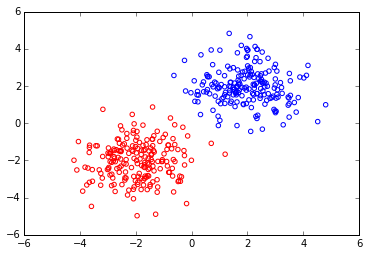

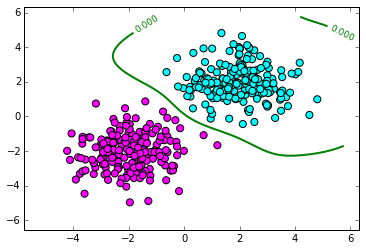

======Validation======


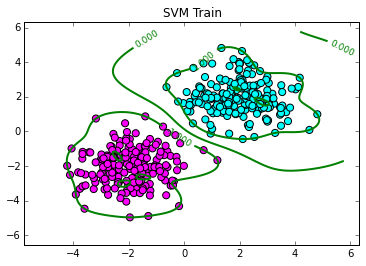

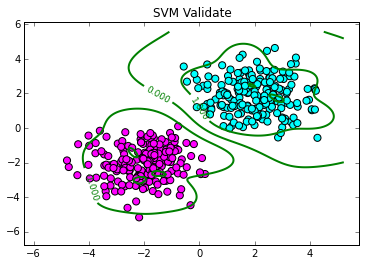

In [9]:
# parameters
name = 'stdev1'
print '======Training======'
# load data from csv files
train = loadtxt('hw2_resources/data/data_'+name+'_train.csv')
# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

# Carry out training, primal and/or dual
svm = SVM(X,Y, kernel='Gaussian', C=100, bandwidth=1)
svm.computeSolution()
svm.plotData()
# Define the predictSVM(x) function, which uses trained parameters
predictSVM = svm.predictorFunction

# plot training results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Train')


print '======Validation======'
# load data from csv files
validate = loadtxt('hw2_resources/data/data_'+name+'_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
# plot validation results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Validate')

======Training======
     pcost       dcost       gap    pres   dres
 0: -3.9510e+01 -6.9147e+02  3e+03  2e+00  7e-15
 1: -1.4713e+01 -3.5680e+02  5e+02  1e-01  8e-15
 2: -1.6883e+01 -7.0711e+01  6e+01  2e-02  7e-15
 3: -2.5657e+01 -4.7305e+01  2e+01  5e-03  6e-15
 4: -2.8385e+01 -4.2459e+01  1e+01  3e-03  6e-15
 5: -3.0659e+01 -3.8310e+01  8e+00  1e-03  6e-15
 6: -3.1600e+01 -3.6683e+01  5e+00  9e-04  6e-15
 7: -3.2812e+01 -3.4654e+01  2e+00  3e-04  6e-15
 8: -3.3343e+01 -3.3853e+01  5e-01  3e-05  7e-15
 9: -3.3494e+01 -3.3657e+01  2e-01  8e-06  6e-15
10: -3.3547e+01 -3.3587e+01  4e-02  1e-06  7e-15
11: -3.3562e+01 -3.3570e+01  8e-03  2e-07  7e-15
12: -3.3565e+01 -3.3565e+01  2e-04  2e-09  7e-15
13: -3.3565e+01 -3.3565e+01  2e-06  2e-11  7e-15
Optimal solution found.


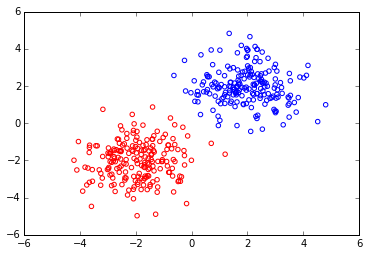

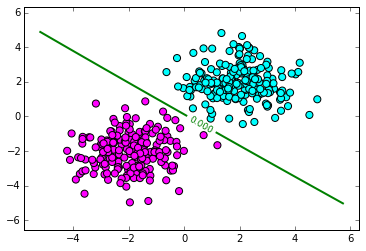

======Validation======


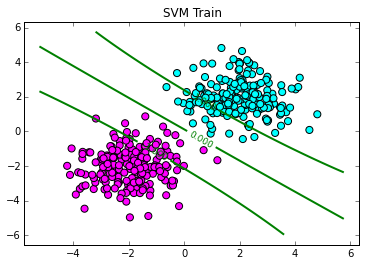

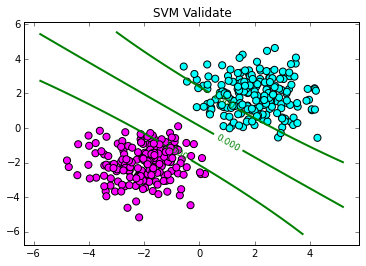

In [10]:
# parameters
name = 'stdev1'
print '======Training======'
# load data from csv files
train = loadtxt('hw2_resources/data/data_'+name+'_train.csv')
# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

# Carry out training, primal and/or dual
svm = SVM(X,Y, kernel='Gaussian', C=1, bandwidth=100)
svm.computeSolution()
svm.plotData()
# Define the predictSVM(x) function, which uses trained parameters
predictSVM = svm.predictorFunction

# plot training results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Train')


print '======Validation======'
# load data from csv files
validate = loadtxt('hw2_resources/data/data_'+name+'_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
# plot validation results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Validate')

======Training======
     pcost       dcost       gap    pres   dres
 0: -1.6792e+02 -6.1628e+02  4e+02  1e-13  4e-16
 1: -1.7625e+02 -2.0490e+02  3e+01  5e-15  2e-16
 2: -1.8441e+02 -1.9013e+02  6e+00  4e-14  1e-16
 3: -1.8603e+02 -1.8695e+02  9e-01  2e-14  9e-17
 4: -1.8631e+02 -1.8642e+02  1e-01  3e-14  8e-17
 5: -1.8635e+02 -1.8636e+02  1e-02  2e-13  8e-17
 6: -1.8635e+02 -1.8635e+02  1e-03  2e-14  8e-17
 7: -1.8635e+02 -1.8635e+02  8e-05  2e-13  8e-17
Optimal solution found.


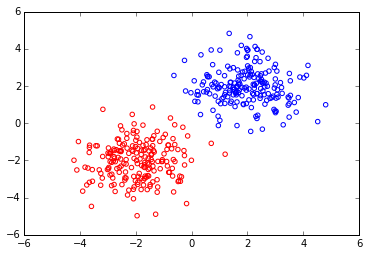

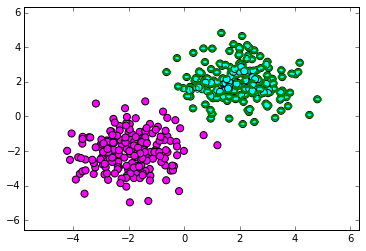

======Validation======


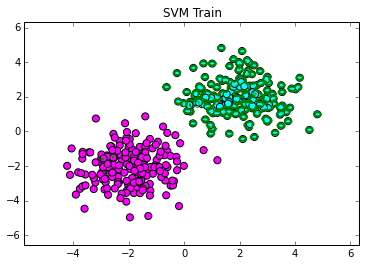

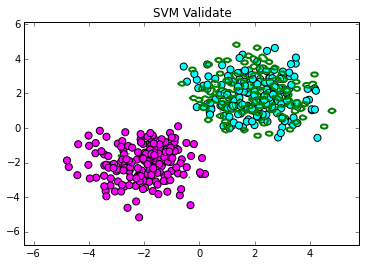

In [11]:
# parameters
name = 'stdev1'
print '======Training======'
# load data from csv files
train = loadtxt('hw2_resources/data/data_'+name+'_train.csv')
# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

# Carry out training, primal and/or dual
svm = SVM(X,Y, kernel='Gaussian', C=1, bandwidth=0.001)
svm.computeSolution()
svm.plotData()
# Define the predictSVM(x) function, which uses trained parameters
predictSVM = svm.predictorFunction

# plot training results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Train')


print '======Validation======'
# load data from csv files
validate = loadtxt('hw2_resources/data/data_'+name+'_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
# plot validation results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Validate')

======Training======
     pcost       dcost       gap    pres   dres
 0: -2.7539e+01 -5.2759e+02  5e+02  2e-15  4e-16
 1: -3.3737e+01 -6.4097e+01  3e+01  3e-14  4e-16
 2: -3.5540e+01 -4.0687e+01  5e+00  1e-14  2e-16
 3: -3.5917e+01 -3.6959e+01  1e+00  5e-15  2e-16
 4: -3.6031e+01 -3.6320e+01  3e-01  1e-14  2e-16
 5: -3.6064e+01 -3.6135e+01  7e-02  3e-14  2e-16
 6: -3.6075e+01 -3.6088e+01  1e-02  2e-15  2e-16
 7: -3.6076e+01 -3.6082e+01  6e-03  3e-14  2e-16
 8: -3.6077e+01 -3.6078e+01  9e-04  8e-14  2e-16
 9: -3.6077e+01 -3.6078e+01  1e-04  3e-14  2e-16
10: -3.6078e+01 -3.6078e+01  2e-05  1e-14  2e-16
Optimal solution found.


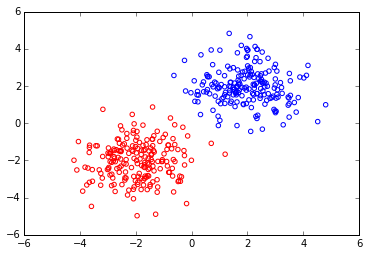

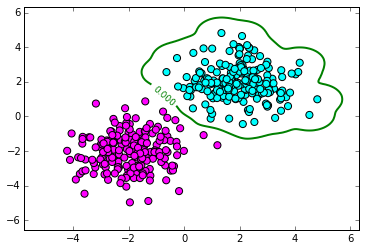

======Validation======


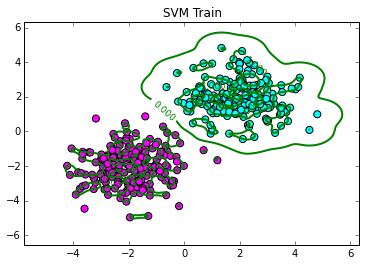

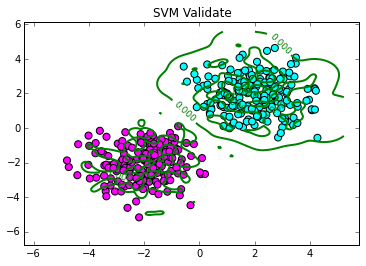

In [12]:
# parameters
name = 'stdev1'
print '======Training======'
# load data from csv files
train = loadtxt('hw2_resources/data/data_'+name+'_train.csv')
# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

# Carry out training, primal and/or dual
svm = SVM(X,Y, kernel='Gaussian', C=1, bandwidth=0.1)
svm.computeSolution()
svm.plotData()
# Define the predictSVM(x) function, which uses trained parameters
predictSVM = svm.predictorFunction

# plot training results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Train')


print '======Validation======'
# load data from csv files
validate = loadtxt('hw2_resources/data/data_'+name+'_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
# plot validation results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Validate')

======Training======
     pcost       dcost       gap    pres   dres
 0: -2.9637e+01 -7.3217e+01  1e+03  2e+01  3e-16
 1: -2.1716e+01 -6.5716e+01  8e+01  6e-01  4e-16
 2: -1.9845e+01 -2.9435e+01  1e+01  2e-15  4e-16
 3: -2.0784e+01 -2.1794e+01  1e+00  1e-14  3e-16
 4: -2.1029e+01 -2.1295e+01  3e-01  5e-15  3e-16
 5: -2.1107e+01 -2.1172e+01  6e-02  4e-16  3e-16
 6: -2.1128e+01 -2.1142e+01  1e-02  3e-15  2e-16
 7: -2.1133e+01 -2.1136e+01  4e-03  2e-14  2e-16
 8: -2.1134e+01 -2.1135e+01  6e-04  3e-14  2e-16
 9: -2.1134e+01 -2.1134e+01  7e-05  8e-15  3e-16
10: -2.1134e+01 -2.1134e+01  5e-06  4e-15  3e-16
Optimal solution found.


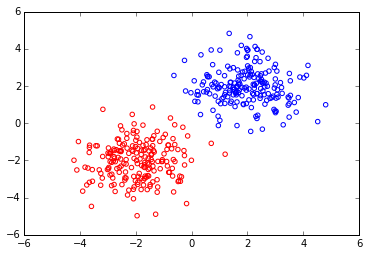

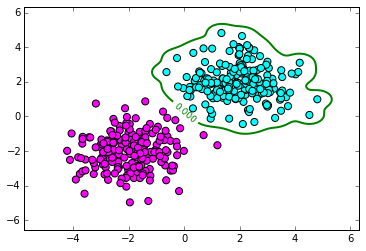

======Validation======


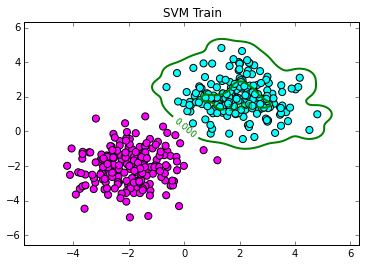

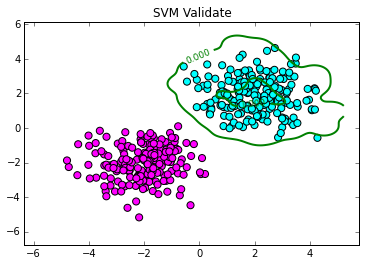

In [13]:
# parameters
name = 'stdev1'
print '======Training======'
# load data from csv files
train = loadtxt('hw2_resources/data/data_'+name+'_train.csv')
# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

# Carry out training, primal and/or dual
svm = SVM(X,Y, kernel='Gaussian', C=.1, bandwidth=0.1)
svm.computeSolution()
svm.plotData()
# Define the predictSVM(x) function, which uses trained parameters
predictSVM = svm.predictorFunction

# plot training results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Train')


print '======Validation======'
# load data from csv files
validate = loadtxt('hw2_resources/data/data_'+name+'_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
# plot validation results
plotDecisionBoundary(X, Y, predictSVM, [-1, 0, 1], title = 'SVM Validate')